# Overview

[Nonparametric statistics](https://en.wikipedia.org/wiki/Nonparametric_statistics) is a branch os statistics based on either being distribution-free or having a specified distribution but with the distribution's parameters unspecified. Nonparametric statistics includes both descriptive statistics and statistical inference.


KDE is a non-parametric technique, which as the name suggests, uses  a [kernel](../../Mathematics/Functions/Kernels.ipynb) function $k$ as an estimate for an unknown density function $f$. 

Note: dont confuse density with probability density. They are related, but pure density is more like a [histogram](../../Data%20Science/Exploratory%20Data%20Analysis%20%28EDA%29/Histograms%20and%20Probability.ipynb).

In a later section we look at the exact mathematical formulation of thistechnique.

# 1. Terminology
KDE is sometimes named as the Parzen Window Method or Parzen Window Estimation in honor of one of its inventors Emanuel Parzen.

We can then infer that a Parzen Window is synonimous with a [kernel](../../Mathematics/Functions/Kernels.ipynb).

Parzen windows can be used in classification problems. 
> Parzen windows can be regarded as a generalization of k-nearest neighbor techniques. Rather than choosing the k nearest neighbors of a test point and labelling the test point with the weighted majority of its neighbors' votes, one can consider all points in the voting scheme and assign their weight by means of the kernel function. With Gaussian kernels, the weight decreases exponentially with the square of the distance, so far away points are practically irrelevant. The width $\sigma$ of the Guassian determines the relative weighting of near and far points. Tuning this parameter controls the predictive power of the system. We have empirically optimized the value of $\sigma$.
>
> https://compbio.soe.ucsc.edu/genex/genexTR2html/node11.html

# 2. Applications
KDE can also be used as a smoothing technique. In a nutshell, the estimated distribution will allow to quantify trends in the raw data and extrapoloate/interpolate a smooth set of datapoints which track this trend. In this context we are talking about probabalistic or [stochastic regression](../../Mathematics/Stochastics/Stochastic%20Process%20Regression.ipynb).

# 3. Definition

The kernel density estimation $\hat f_X$ for the density function $f_X$ of a random variable $X$ witha kernel $k$ is defined as:

$$ \hat f_X = \frac{1}{nh} \sum  k \left( \frac{X - x_i}{h} \right) $$

Where $h$ is called the smoothing, scaling, or bandwidth term.

Looking at the formula we see that the KDE is based on a weighted moving average.

Below we can see an example kernel density estimation of 100 normally distributed random numbers using different smoothing bandwidths as compared to the actual normal distribution in grey.

<center><img src = 'images/kernel_density_estimation_example.png' width='400px'></center>

There are many different kernels that can be chosen, and many techniques for deciding which kernel is the best fit for the data. We will not get into that here.

## 3.1. Examples

In the examples below, we look at the differences between a few kernel functions being used to estimate a density function. The example was largely taken from [here](https://datascience.stackexchange.com/questions/47984/simple-example-of-parzen-window-kernel-density-estimation) with some of the formulas taken from [here](https://www.researchgate.net/figure/The-Rectangular-Kernel-and-Some-Popular-Alternatives_tbl1_4981643).



Below we can see a plots of various kernel functions (which each take their own set of parameters).

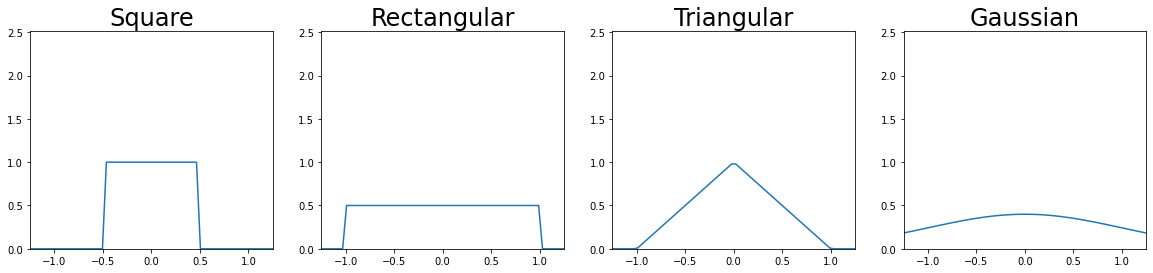

In [2]:
import numpy
import scipy.stats
from matplotlib import pyplot

def square_kernel(x):
    return numpy.where(abs(x) <= 0.5, 1, 0)

def rectangular_kernel(x):
    return numpy.where(abs(x) <= 1, 0.5, 0)
    
def triangular_kernel(x):
    return numpy.where(abs(x) <= 1, 1 - abs(x), 0)

def gaussian_kernel(x):
    return scipy.stats.norm.pdf(x, 0 ,1)
    
x = numpy.linspace(-2,2,100)
y = numpy.array([]).reshape(-1,5)
y =  numpy.column_stack((
    square_kernel(x),
    rectangular_kernel(x),
    triangular_kernel(x),
    gaussian_kernel(x)
))

fig, ax = pyplot.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i in range(0, y.shape[1]):
    ax[i].plot(x, y.T[i])
    ax[i].set_xlim([-1.25, 1.251])
    ax[i].set_ylim([0, 2.51])

ax[0].set_title("Square", fontsize=24)
ax[1].set_title("Rectangular", fontsize=24)
ax[2].set_title("Triangular", fontsize=24)
ax[3].set_title("Gaussian", fontsize=24)


pyplot.show()

For each kernel function above, we see that the area under the curve is positive. Thus the sum of all the values is positive. This is an important characteristic which tells us these functions are **positive definite**. 

Below we can see an example data set for an arbitrary function:

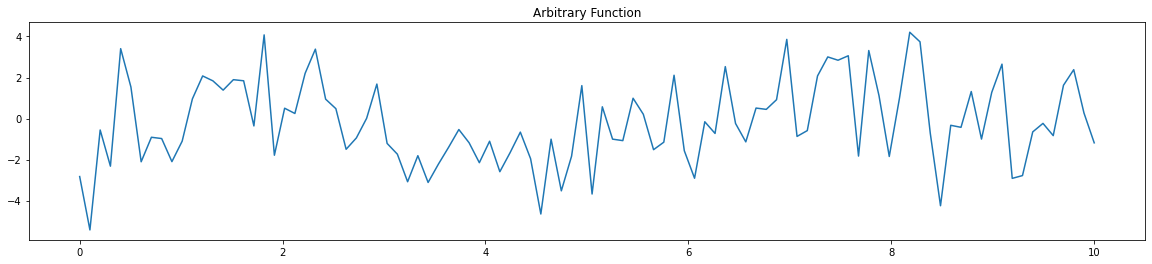

In [4]:
import numpy
import pandas

x = numpy.linspace(0, 10, 100)
y = numpy.sin(x) + numpy.random.normal(0,2,x.shape[0])
df = pandas.DataFrame({
    'x': x,
    'y': y
})

fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(df['x'], df['y'])
ax.set_title("Arbitrary Function")
pyplot.show()

If we perform the KDE, we see the following density estimations produced:

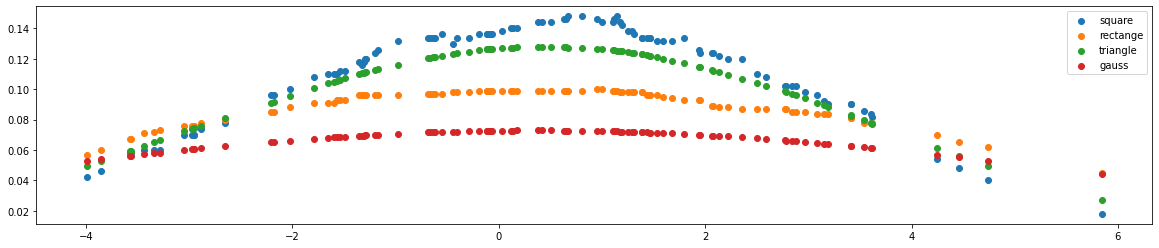

In [299]:
def apply_kernel(x, kernel_function):
    return numpy.sum(kernel_function(x))


def calculate_distance(x, x_i, h):
    return (x - x_i) / h

def perform_kde(x, x_i, h, kernel_function):
    distance = calculate_distance(x, x_i, h)
    k_val = numpy.sum(apply_kernel(distance, kernel_function))
    k_val = (1/ (x.shape[0] * h)) * k_val
    return k_val

df['k1'] = df['y'].apply(lambda x: perform_kde(df['y'], x, 5, square_kernel))
df['k2'] = df['y'].apply(lambda x: perform_kde(df['y'], x, 5, rectangular_kernel))
df['k3'] = df['y'].apply(lambda x: perform_kde(df['y'], x, 5, triangular_kernel))
df['k4'] = df['y'].apply(lambda x: perform_kde(df['y'], x, 5, gaussian_kernel))

fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.scatter(df['y'],df['k1'], label='square')
ax.scatter(df['y'],df['k2'], label='rectange')
ax.scatter(df['y'],df['k3'], label='triangle')
ax.scatter(df['y'],df['k4'], label='gauss')
ax.legend()
pyplot.show()

Compare this with the histogram produced from the sample dataset

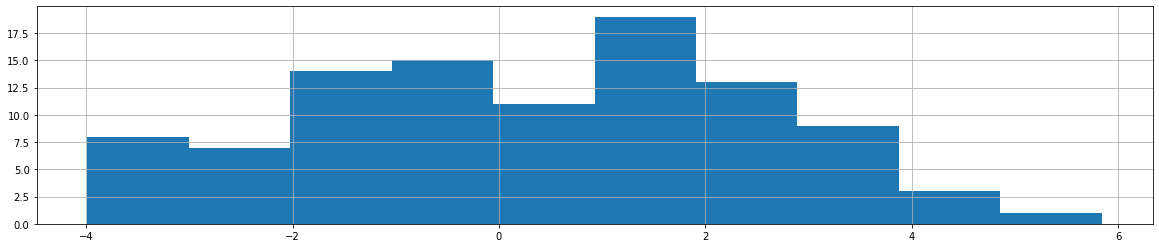

In [300]:
import math
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(20, 4))
df['y'].hist()
pyplot.show()

Comparing the KDE with the histogram we see the same asymetries and roughly the same moments.